In [392]:
from itertools import combinations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA



In [393]:
DATA_FILE_PATH = 'StudentsPerformance.csv'

data_raw = pd.read_csv(filepath_or_buffer=DATA_FILE_PATH)
data_raw = data_raw.dropna()
data_raw.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [394]:
data_raw.shape


(1000, 8)

In [395]:
data_raw.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [396]:

for column in data_raw.columns:
    if(data_raw[column].dtype == np.object_):
        print(f"Unique values of '{column}':\n {data_raw[column].unique()}\n")


Unique values of 'gender':
 ['female' 'male']

Unique values of 'race/ethnicity':
 ['group B' 'group C' 'group A' 'group D' 'group E']

Unique values of 'parental level of education':
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values of 'lunch':
 ['standard' 'free/reduced']

Unique values of 'test preparation course':
 ['none' 'completed']



In [397]:
data_raw.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [398]:
for col in data_raw.columns:
    if(data_raw[col].dtype != np.object_):
        q_low = data_raw[col].quantile(0.01)
        q_hi = data_raw[col].quantile(0.99)
        outliers = data_raw[(data_raw[col] > q_hi) | (data_raw[col] < q_low)]
        if len(outliers) > 0:
            print(
                f'column: {col}, outliers:\n{[val for val in outliers[col]]}')
        else:
            print(f'column: {col}, no outliers')
    else:
        print(f'column: {col}, no outliers')


column: gender, no outliers
column: race/ethnicity, no outliers
column: parental level of education, no outliers
column: lunch, no outliers
column: test preparation course, no outliers
column: math score, outliers:
[18, 0, 27, 99, 22, 100, 99, 99, 24, 27, 100, 100, 26, 100, 100, 19, 23, 100, 100, 8]
column: reading score, outliers:
[17, 26, 28, 23, 31, 24, 29, 31, 29, 24]
column: writing score, outliers:
[28, 10, 22, 27, 19, 27, 15, 30, 27, 23]


In [399]:
le = LabelEncoder()
data_encoded = data_raw.copy()

for column in data_encoded.columns:
    if(data_encoded[column].dtype == np.object_):
        le.fit(data_encoded[column])
        data_encoded[column] = le.transform(data_encoded[column])

data_encoded.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [400]:
data_encoded.describe()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000


In [401]:
data_encoded.describe().isnull()



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,False,False,False,False,False,False,False,False
mean,False,False,False,False,False,False,False,False
std,False,False,False,False,False,False,False,False
min,False,False,False,False,False,False,False,False
25%,False,False,False,False,False,False,False,False
50%,False,False,False,False,False,False,False,False
75%,False,False,False,False,False,False,False,False
max,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Correlation Matrix')

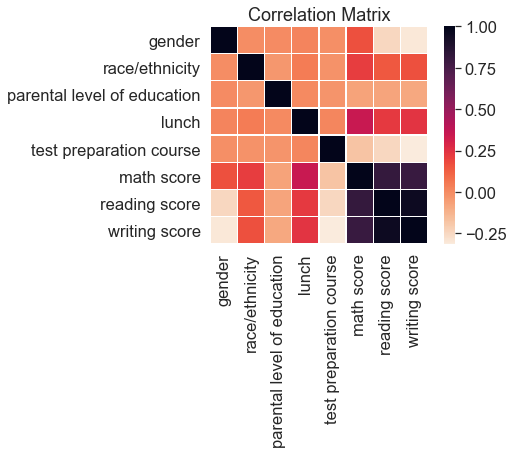

In [402]:
corr = data_encoded.corr()
sns.heatmap(data=corr, square=True, linewidths=.5,
            cmap='rocket_r').set_title('Correlation Matrix')



Text(0.5, 1.0, 'Absolute Correlation Matrix')

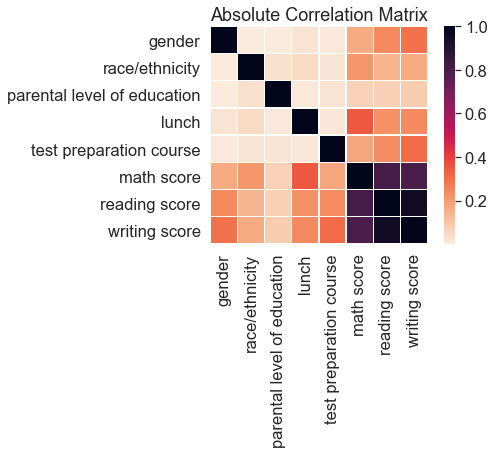

In [403]:
sns.heatmap(data=abs(corr), square=True, linewidths=.5,
            cmap='rocket_r').set_title('Absolute Correlation Matrix')


Text(0.075, 0.5, 'Occurrencies count')

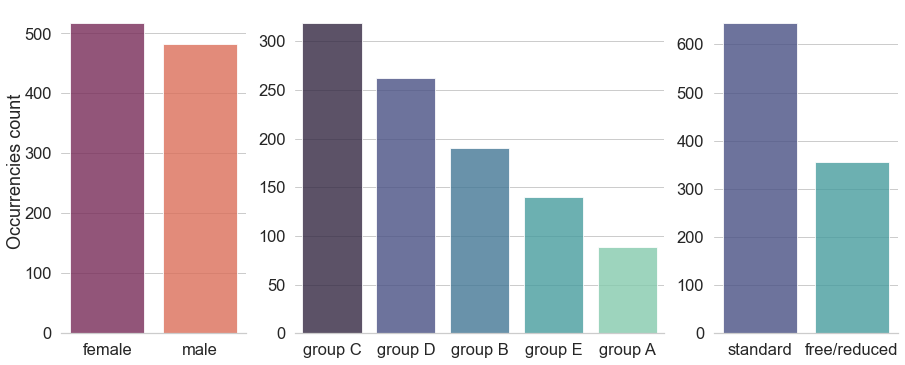

In [404]:

fig = plt.figure(figsize=(15, 6))

gs = gridspec.GridSpec(1, 3, width_ratios=[1, 2, 1])
ax = plt.subplot(gs[0])
sns.barplot(ax=ax,
            x=data_raw['gender'].value_counts().index,
            y=data_raw['gender'].value_counts().values, palette='rocket', alpha=.8)
sns.despine(left=True)

ax = plt.subplot(gs[1])
sns.barplot(ax=ax,
            x=data_raw['race/ethnicity'].value_counts().index,
            y=data_raw['race/ethnicity'].value_counts().values, palette='mako', alpha=.8)
sns.despine(left=True)

ax = plt.subplot(gs[2])
sns.barplot(ax=ax,
            x=data_raw['lunch'].value_counts().index,
            y=data_raw['lunch'].value_counts().values, palette='mako', alpha=.8)
sns.despine(left=True)
fig.text(0.075, 0.5, "Occurrencies count", rotation="vertical", va="center")


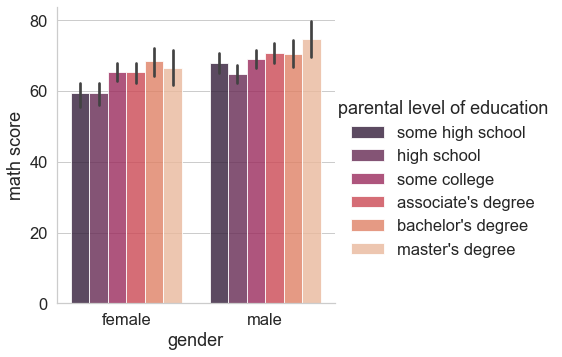

In [405]:
data_plot = data_raw.copy()
data_plot.sort_values(by=['math score'], inplace=True)
g = sns.catplot(
    data=data_plot, x='gender',  y='math score', hue='parental level of education',
    kind='bar', palette='rocket', alpha=.8)



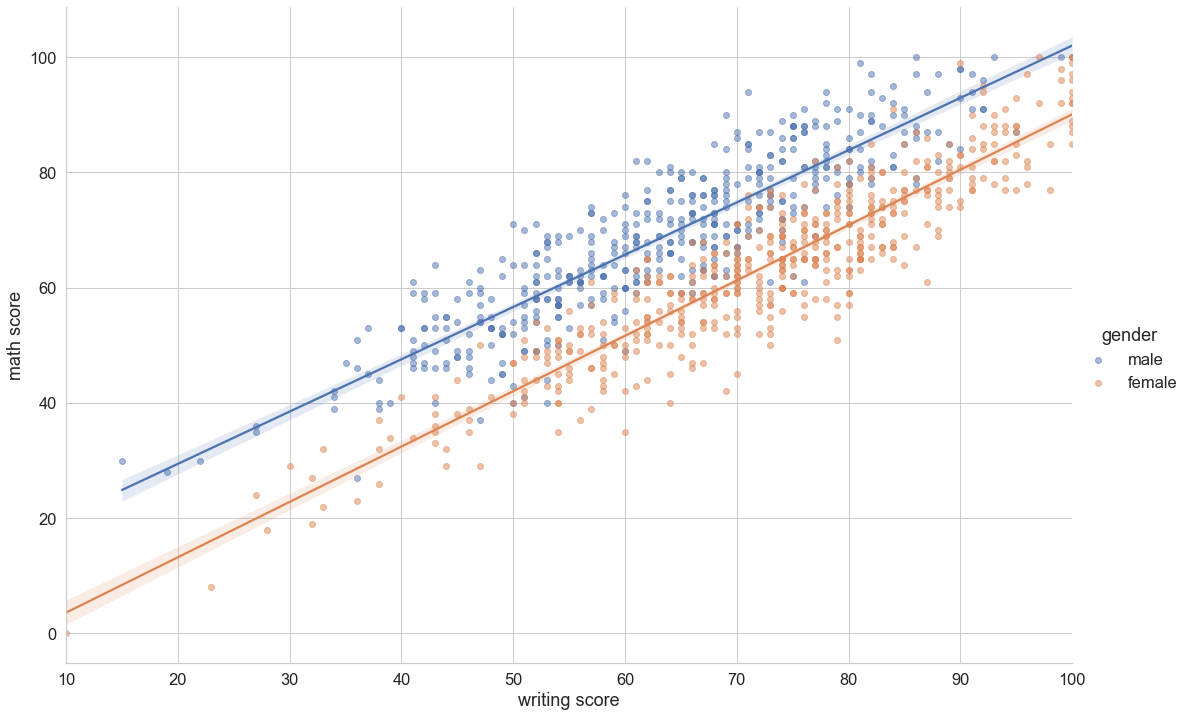

In [406]:

sns.lmplot(data=data_plot, x='writing score', y='math score', hue='gender',
           hue_order=['male', 'female'], height=10, aspect=1.5,  scatter_kws={'alpha': 0.5})


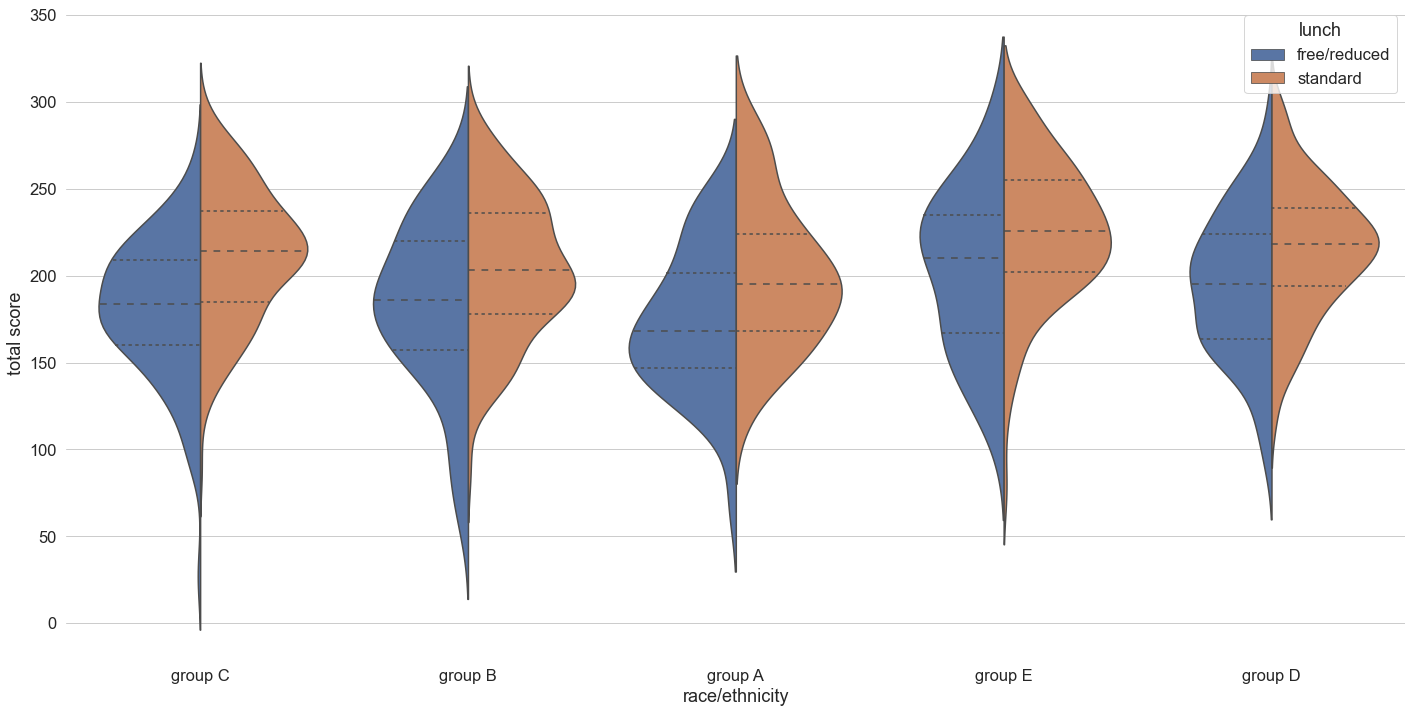

In [407]:
data_plot['total score'] = data_plot['math score'] + \
    data_plot['reading score'] + data_plot['writing score']
data_plot.sort_values(by=['total score'], inplace=True)


fig, ax = plt.subplots(figsize=(24, 12))
sns.set(font_scale=1.5, style='whitegrid')
sns.violinplot(ax=ax, data=data_plot, x='race/ethnicity', y='total score',
               hue='lunch', inner='quart', split=True, figsize=(22, 12))
sns.despine(left=True, bottom=True)


In [408]:


class Model:

    def __init__(self, model, data: pd.DataFrame, target_label: str, include: list = [], test_size: float = 0.25, seed: int = None, **model_params: any) -> None:
        self.model = model(
            **model_params) if isinstance(model, type) else model
        self.test_size = test_size
        self.seed = seed
        self.data = data.copy()
        self.accuracy_cv = []
        self.accuracy = 0
        self.accuracies = {}
        self.target_label = target_label
        self.cv = 5
        self.set_data(include=include)

    def set_data(self, data: pd.DataFrame = None, target_label: str = None, include: list = []) -> None:
        self.X = data or self.data.copy()
        self.Y = self.X.pop(target_label or self.target_label)
        if include:
            self.X = self.X[include]

        scaler = StandardScaler().fit(self.X)
        self.X = scaler.transform(self.X)

        # pca = PCA(n_components=min(4, len(include))).fit(self.X)
        # self.X = pca.transform(self.X)

        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(
            self.X, self.Y, test_size=self.test_size, random_state=self.seed)

    def find_optimal_columns(self, score_func: callable) -> tuple:
        self.accuracies = {}
        columns = list(self.data.columns)
        columns.remove(self.target_label)

        for combination_length in range(1, len(columns)+1):
            for combination in combinations(columns, combination_length):
                self.set_data(include=list(combination))
                self.accuracies[combination] = score_func()
        optimal_columns = max(self.accuracies, key=self.accuracies.get)
        print(f'\nModel: {type(self.model).__name__}')
        print(f'Optimal columns: {optimal_columns}')
        print(f'Mean {self.cv}-fold accuracy: {self.accuracies[optimal_columns]}')
        return optimal_columns

    def score_cv(self, cv: int = None, **params: any) -> list:
        self.accuracy_cv = cross_val_score(
            self.model, self.X, self.Y, cv=cv or self.cv, **params)
        mean_accuracy_cv = np.mean(self.accuracy_cv)
        return mean_accuracy_cv

    def score(self):
        self.model = self.model.fit(self.X_train, self.Y_train)
        self.accuracy = self.model.score(self.X_test, self.Y_test)
        print(f'\nModel: {type(self.model).__name__}')
        print(f'Accuracy: {self.accuracy}')
        return self.accuracy


target_label = 'math score'
seed = 0
models = [LinearRegression, Lasso(alpha=0.5), RandomForestRegressor(
    max_depth=10), ElasticNet(alpha=0.5)]

for model in models:
    m = Model(model, data_encoded, target_label, seed=seed)
    m.find_optimal_columns(score_func=m.score_cv)




Model: LinearRegression
Optimal columns: ('gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score')
Mean 5-fold accuracy: 0.8637116520649144

Model: Lasso
Optimal columns: ('gender', 'race/ethnicity', 'lunch', 'test preparation course', 'reading score', 'writing score')
Mean 5-fold accuracy: 0.8568774252943351

Model: RandomForestRegressor
Optimal columns: ('gender', 'race/ethnicity', 'lunch', 'test preparation course', 'reading score', 'writing score')
Mean 5-fold accuracy: 0.8387255346831713

Model: ElasticNet
Optimal columns: ('gender', 'race/ethnicity', 'lunch', 'test preparation course', 'reading score', 'writing score')
Mean 5-fold accuracy: 0.8294049593324132


In [409]:

target_label = 'gender'
seed = 0
lm = Model(LogisticRegression, data_encoded, target_label, seed=seed)
_ = lm.find_optimal_columns(score_func=lm.score_cv)



Model: LogisticRegression
Optimal columns: ('race/ethnicity', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score')
Mean 5-fold accuracy: 0.8960000000000001
